## Covid-19 Vaccines Analysis with Python

There was a time when Covid-19 got out of hand. Even after the lockdown, this still resulted in a rapid increase in cases as in some countries cases were brought under control but the economy was sacrificed. In such a situation, only vaccines are seen as the only tool that can help the world fight covid-19. In this article, I will walk you through the task of Covid-19 vaccines analysis with Python.

## Covid-19 Vaccines Analysis

Many vaccines have been introduced so far to fight covid-19. No vaccine has guaranteed 100% accuracy so far, but most manufacturing companies claim their vaccine is not 100% accurate, but still, it will save your life by giving you immunity.

Thus, each country tries to vaccinate a large part of its population so as not to depend on a single vaccine. That’s what I’m going to analyze in this article, which is how many vaccines each country is using to fight covid-19. In the section below, I will take you through a data science tutorial on Covid-19 vaccines analysis with Python.

### Covid-19 Vaccines Analysis with Python

The dataset that I will be using here for the task of covid-19 vaccines analysis is taken from Kaggle. Let’s start by importing the necessary Python libraries and the dataset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import cv2
import datetime

%matplotlib inline

## Data Loading

In [66]:
data = pd.read_csv(r".\data\country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [67]:
print(data.head())

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

### Now let’s explore this data before we start analyzing the vaccines taken by countries

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25862 non-null  object 
 1   iso_code                             25862 non-null  object 
 2   date                                 25862 non-null  object 
 3   total_vaccinations                   14522 non-null  float64
 4   people_vaccinated                    13762 non-null  float64
 5   people_fully_vaccinated              11041 non-null  float64
 6   daily_vaccinations_raw               12003 non-null  float64
 7   daily_vaccinations                   25595 non-null  float64
 8   total_vaccinations_per_hundred       14522 non-null  float64
 9   people_vaccinated_per_hundred        13762 non-null  float64
 10  people_fully_vaccinated_per_hundred  11041 non-null  float64
 11  daily_vaccinations_per_milli

In [69]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.452200e+04,1.376200e+04,1.104100e+04,1.200300e+04,2.559500e+04,14522.000000,13762.000000,11041.000000,25595.000000
mean,9.139252e+06,4.737802e+06,2.681353e+06,2.012910e+05,1.020430e+05,24.162602,16.291051,9.712350,3312.476421
std,4.592776e+07,1.797156e+07,1.093032e+07,1.122962e+06,7.304361e+05,30.690367,18.839369,13.466102,4512.443697
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.005620e+05,7.876700e+04,3.719700e+04,3.967500e+03,8.400000e+02,2.360000,2.052500,1.020000,389.000000
50%,7.007560e+05,5.149065e+05,2.834740e+05,1.988600e+04,6.263000e+03,11.410000,8.520000,4.190000,1726.000000
75%,3.241681e+06,2.139073e+06,1.192415e+06,8.257600e+04,3.337300e+04,34.650000,25.207500,12.690000,4874.000000
max,1.029223e+09,6.220000e+08,2.232990e+08,2.360500e+07,2.029871e+07,231.010000,116.150000,114.860000,118759.000000


In [70]:
print(data.describe())

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        1.452200e+04       1.376200e+04             1.104100e+04   
mean         9.139252e+06       4.737802e+06             2.681353e+06   
std          4.592776e+07       1.797156e+07             1.093032e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          1.005620e+05       7.876700e+04             3.719700e+04   
50%          7.007560e+05       5.149065e+05             2.834740e+05   
75%          3.241681e+06       2.139073e+06             1.192415e+06   
max          1.029223e+09       6.220000e+08             2.232990e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            1.200300e+04        2.559500e+04   
mean             2.012910e+05        1.020430e+05   
std              1.122962e+06        7.304361e+05   
min              0.000000e+00        0.000000e+00   
25%              3.967500e+03        8.400000e+02   
50%              1.98860

In [71]:
print(data.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [72]:
pd.to_datetime(data.date)

0       2021-02-22
1       2021-02-23
2       2021-02-24
3       2021-02-25
4       2021-02-26
           ...    
25857   2021-06-16
25858   2021-06-17
25859   2021-06-18
25860   2021-06-19
25861   2021-06-20
Name: date, Length: 25862, dtype: datetime64[ns]

In [73]:
data.country.value_counts()


Norway                             201
Scotland                           193
Canada                             189
China                              188
Russia                             188
                                  ... 
Burkina Faso                        13
Bonaire Sint Eustatius and Saba      1
Pitcairn                             1
Turkmenistan                         1
Chad                                 1
Name: country, Length: 217, dtype: int64

#### Now let’s explore the vaccines available in this dataset

In [74]:
data.vaccines.value_counts()

Oxford/AstraZeneca                                                                             4326
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  3437
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2222
Oxford/AstraZeneca, Pfizer/BioNTech                                                            1697
Moderna, Pfizer/BioNTech                                                                       1394
Pfizer/BioNTech                                                                                1143
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1122
Oxford/AstraZeneca, Sinopharm/Beijing                                                          1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1033
Oxford/AstraZeneca, Sputnik V                                                                   558


##### So we have almost all the Covid-19 vaccines available in this dataset. Now I will create a new DataFrame by only selecting the vaccine and the country columns to explore which vaccine is taken by which country

In [75]:
df = data[["vaccines", "country"]]
df.head()


,vaccines,country
0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",Afghanistan
1,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",Afghanistan
2,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",Afghanistan
3,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",Afghanistan
4,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",Afghanistan


##### Now let’s see how many countries are taking each of the vaccines mentioned in this data

In [76]:
dict_ = {}
for i in df.vaccines.unique():
  dict_[i] = [df["country"][j] for j in df[df["vaccines"] == i].index]

vaccines = {}
for key, value in dict_.items():
  vaccines[key] = set(value)
for i, j in vaccines.items():
  print(f"{i}:>>{j}")

BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech:>>{'Afghanistan'}
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V:>>{'Bosnia and Herzegovina', 'Albania', 'Tunisia', 'Philippines'}
Oxford/AstraZeneca, Sputnik V:>>{'Guyana', 'Ghana', 'Kenya', 'Nicaragua', 'Algeria'}
Oxford/AstraZeneca, Pfizer/BioNTech:>>{'Andorra', 'Saudi Arabia', 'Costa Rica', 'Sweden', 'Panama', 'Cape Verde', 'Oman', 'Isle of Man', 'Australia', 'Cayman Islands', 'Slovenia'}
Oxford/AstraZeneca:>>{'Cook Islands', 'Nauru', 'Solomon Islands', 'Suriname', 'Barbados', 'Botswana', "Cote d'Ivoire", 'Madagascar', 'Trinidad and Tobago', 'Fiji', 'Saint Kitts and Nevis', 'Pitcairn', 'Kosovo', 'Jamaica', 'Montserrat', 'Saint Lucia', 'Nigeria', 'Burkina Faso', 'Saint Helena', 'Uganda', 'Bhutan', 'British Virgin Islands', 'Eswatini', 'South Sudan', 'Vanuatu', 'Togo', 'Myanmar', 'Lesotho', 'Saint Vincent and the Grenadines', 'Georgia', 'Wallis and Futuna', 'Sao Tome and Principe', 'French Polynesia', 'Mali', 'Anguilla', 'Tajik

#### Now let’s visualize this data to have a look at what combination of vaccines every country is using

In [77]:
vaccine_map = px.choropleth(data, locations='iso_code', color='vaccines')
vaccine_map.update_layout(height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0})
vaccine_map.show()

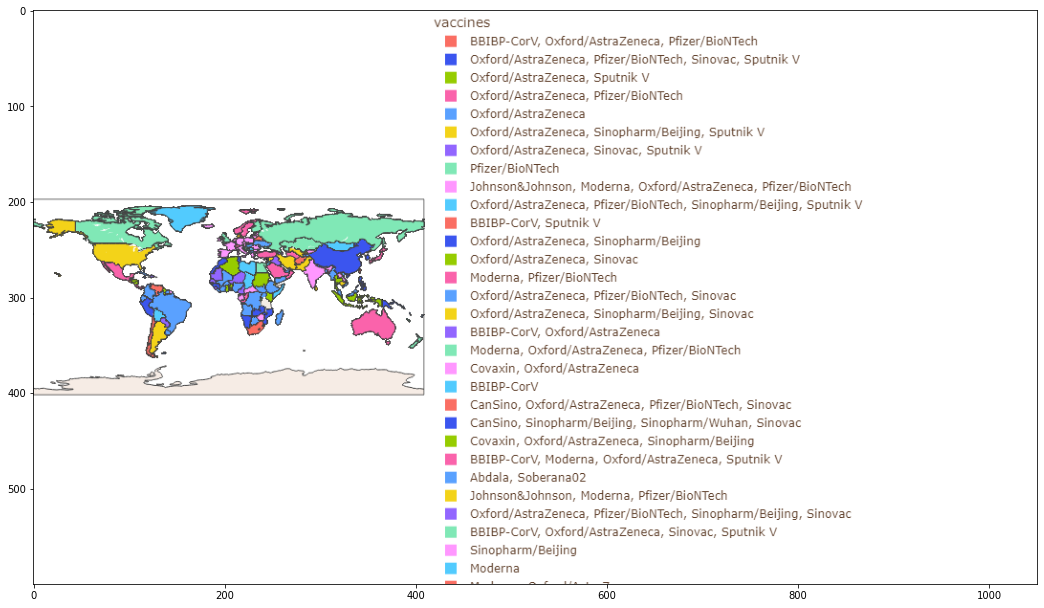

In [83]:
final_output = cv2.imread(".\\final_output.png", cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18,12))
plt.imshow(final_output)

### Summary

So this is how we can analyze the type of vaccines taken by each country today. You can explore more insights from this dataset as there is a lot that you can do with this data. I hope you liked this article on Covid-19 Vaccines analysis using Python. Feel free to ask your valuable questions in the comments section below.

## Sheikh Rasel Ahmed

##### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast


##### LinkedIn - https://www.linkedin.com/in/shekhnirob1

##### GitHub - https://github.com/Rasel1435

##### Behance - https://www.behance.net/Shekhrasel2513